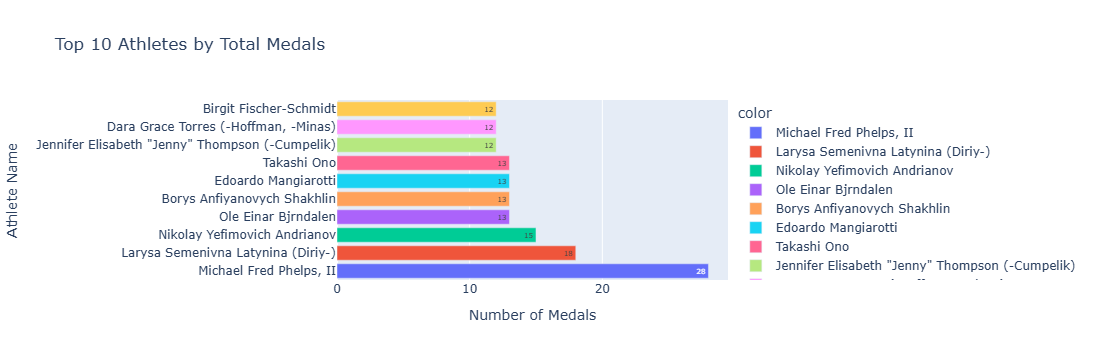

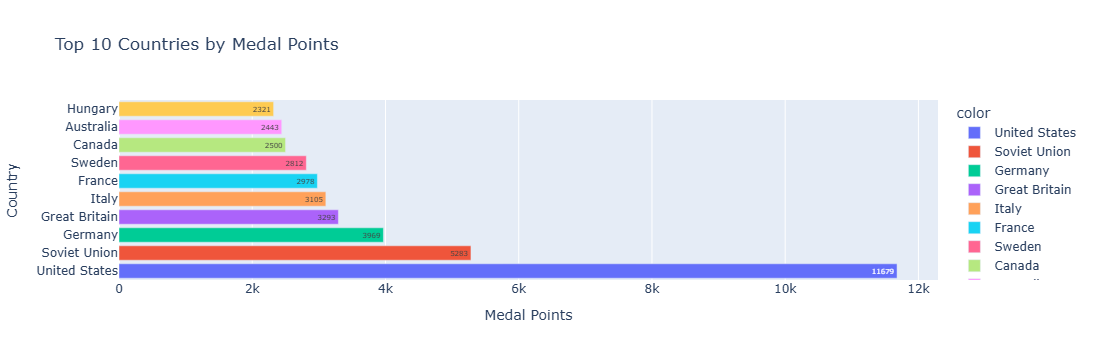

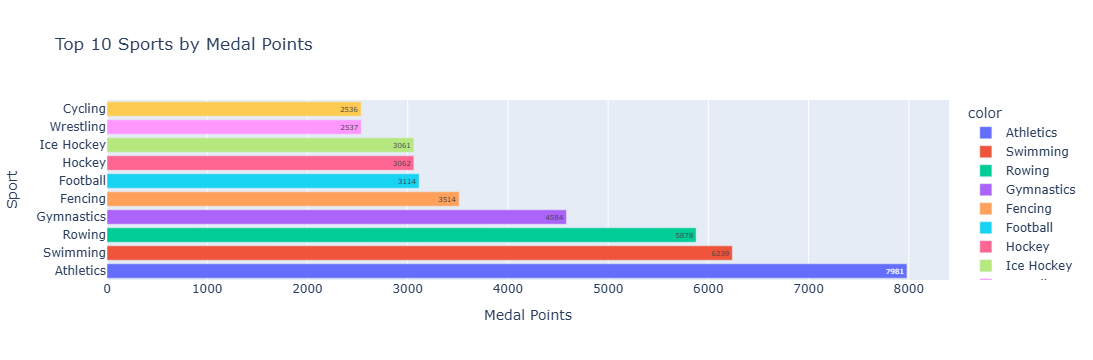

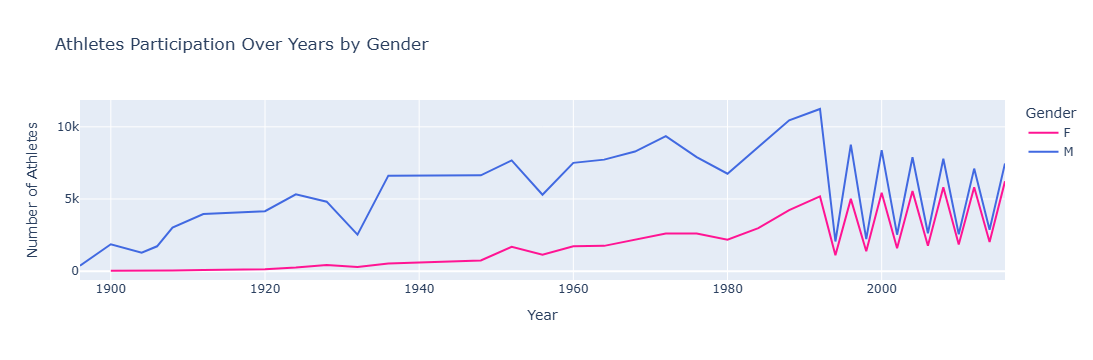

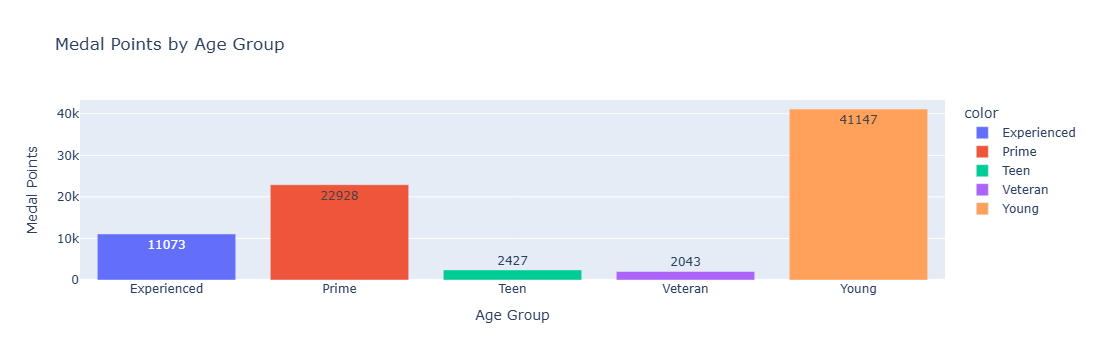

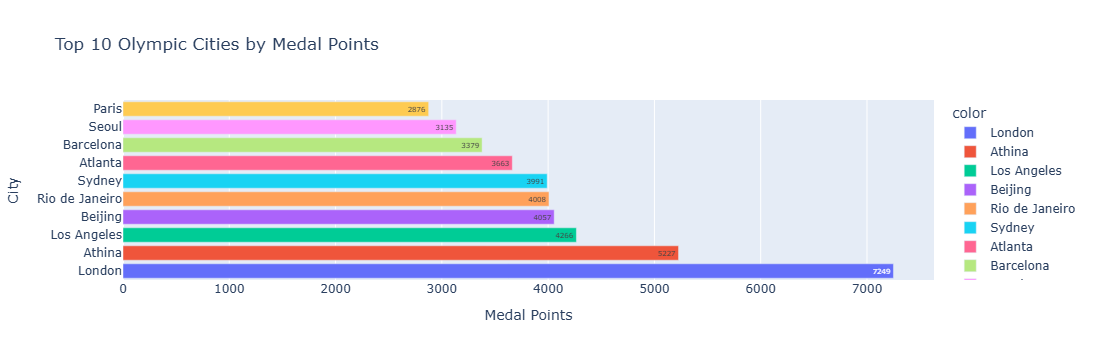

In [1]:
# ===========================
# IMPORT LIBRARIES
# ===========================

import pandas as pd
import plotly.express as px

# ===========================
# 1️) LOAD CLEANED DATASET
# ===========================

file_path = r"E:\data\athlete_events.csv"   # my ecxel file path 
df = pd.read_csv(file_path)                 # data frame -> df is like an Excel sheet inside Python

df = df.drop_duplicates().copy()            # removes repeated rows and craetes a 

df['Age'] = df['Age'].fillna(df['Age'].median())     # finds the missing values and replaces them with median age
df['Height'] = df['Height'].fillna(df['Height'].median())   # missing height to median height
df['Weight'] = df['Weight'].fillna(df['Weight'].median())   # missing weight to median weight
df['Medal'] = df['Medal'].fillna("None")                    # replaces the missing medals to None

# ===========================
# 2️) CREATE HELPER COLUMNS
# ===========================
                                    # here comaprison of ages is done 
def age_group(age):
    if age < 18:
        return "Teen"
    elif age <= 25:
        return "Young"
    elif age <= 30:
        return "Prime"
    elif age <= 40:
        return "Experienced"
    else:
        return "Veteran"

df['Age_Group'] = df['Age'].apply(age_group)        # creates column Age_group

medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}   # dictionary mapping converting medals to numeric scores to calculate after
df['Medal_Points'] = df['Medal'].map(medal_points)

# ===========================
# 3️) TOP 10 ATHLETES BY MEDALS
# ===========================

athlete_medals = (
    df[df['Medal'] != 'None']      # Filters only medal winners
    .groupby('Name')['Medal']      # Groups data by athlete name
    .count()                       # Counts number of medals per athlete
    .sort_values(ascending=False)  # Sorts from highest to lowest
    .head(10)                      #Selects top 10 athletes
)

fig_athletes = px.bar(            # craetes horizontal bar graphh
    x=athlete_medals.values,
    y=athlete_medals.index,
    orientation='h',
    color=athlete_medals.index,    # uses different colors
    title="Top 10 Athletes by Total Medals",
    labels={'x': 'Number of Medals', 'y': 'Athlete Name'},
    text=athlete_medals.values      # shows text on bar graph
)
fig_athletes.show()       # displays the interactive chart

# the code or statement after these are worked similar the above ones

# ===========================
# 4️) TOP 10 COUNTRIES BY MEDAL POINTS
# ===========================

country_medals = (
    df[df['Medal'] != 'None']
    .groupby('Team')['Medal_Points']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

fig_countries = px.bar(
    x=country_medals.values,
    y=country_medals.index,
    orientation='h',
    color=country_medals.index,
    title="Top 10 Countries by Medal Points",
    labels={'x': 'Medal Points', 'y': 'Country'},
    text=country_medals.values
)
fig_countries.show()

# ===========================
# 5️) TOP 10 SPORTS BY MEDAL POINTS
# ===========================

sport_medals = (
    df[df['Medal'] != 'None']
    .groupby('Sport')['Medal_Points']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

fig_sports = px.bar(
    x=sport_medals.values,
    y=sport_medals.index,
    orientation='h',
    color=sport_medals.index,
    title="Top 10 Sports by Medal Points",
    labels={'x': 'Medal Points', 'y': 'Sport'},
    text=sport_medals.values
)
fig_sports.show()

# ===========================
# 6️) GENDER PARTICIPATION OVER YEARS
# ===========================

gender_year = (
    df.pivot_table(
        index='Year',
        columns='Sex',
        values='Name',
        aggfunc='count'
    )
    .reset_index()
)

fig_gender = px.line(
    gender_year,
    x='Year',
    y=['F', 'M'],
    title="Athletes Participation Over Years by Gender",
    labels={'value': 'Number of Athletes', 'variable': 'Gender'},
    color_discrete_map={
        'F': 'deeppink',
        'M': 'royalblue'
    }
)
fig_gender.show()

# ===========================
# 7️) AGE GROUP MEDAL POINTS
# ===========================

age_medals = (
    df[df['Medal'] != 'None']
    .groupby('Age_Group')['Medal_Points']
    .sum()
    .sort_index()
)

fig_age = px.bar(
    x=age_medals.index,
    y=age_medals.values,
    color=age_medals.index,
    title="Medal Points by Age Group",
    labels={'x': 'Age Group', 'y': 'Medal Points'},
    text=age_medals.values
)
fig_age.show()

# ===========================
# 8️) TOP 10 OLYMPIC CITIES BY MEDAL POINTS
# ===========================

city_medals = (
    df[df['Medal'] != 'None']
    .groupby('City')['Medal_Points']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

fig_city = px.bar(
    x=city_medals.values,
    y=city_medals.index,
    orientation='h',
    color=city_medals.index,
    title="Top 10 Olympic Cities by Medal Points",
    labels={'x': 'Medal Points', 'y': 'City'},
    text=city_medals.values
)
fig_city.show()
